In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
main_df = pd.read_csv("london_borough_low_pay.csv", skiprows=2,
                      na_values=['NA', ''],
                      skip_blank_lines=True)

In [4]:
sex_df = pd.read_csv('london_borough_low_pay_by_sex.csv', skiprows=2,
                     na_values=['NA', ''],
                     skip_blank_lines=True)

In [5]:
employment_df = pd.read_csv('london_borough_low_pay_by_employment.csv', skiprows=2,
                            na_values=['NA', ''],
                            skip_blank_lines=True)

In [6]:
def clean_dataframe(df):
    df = df.dropna(axis=1, how='all') # Removes any empty columns (axis=1 refers to columns as axis=0 referring to rows is the default)
    df = df.dropna(how='all') # Removes any empty rows
    df.columns = df.columns.str.strip() # Removes whitespace from column name and values
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].str.strip() if df[column].dtype == "object" else df[column]
    # Removes rows after data showing notes, data source, chart source and weblink to data
    df = df[df['Borough'].notna()]
    df = df[~df['Borough'].str.contains('Note:|Data source:|Chart source:|http|London|Profile', na=False)]
    return df

In [7]:
main_df = clean_dataframe(main_df)
sex_df = clean_dataframe(sex_df)
employment_df = clean_dataframe(employment_df)

In [8]:
def convert_percentages(df):
    percentage_columns = [column for column in df.columns if 'Percentage' in column]
    for column in percentage_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [9]:
def convert_numbers(df):
    number_columns = [column for column in df.columns if 'Number' in column]
    for column in number_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [10]:
main_df = convert_percentages(main_df)
main_df = convert_numbers(main_df)
sex_df = convert_percentages(sex_df)
sex_df = convert_numbers(sex_df)
employment_df = convert_percentages(employment_df)
employment_df = convert_numbers(employment_df)

In [35]:
def verify_dataframe(df, name):
    print(f"\nVerifying {name}:")
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nData types:")
    print(df.dtypes)
    print("\nFirst few rows:")
    print(df.head())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nUnique boroughs:")
    print(df['Borough'].unique())

In [36]:
verify_dataframe(main_df, "Main historical dataset")
verify_dataframe(sex_df, "Dataset by sex")
verify_dataframe(employment_df, "Dataset by employment type")


Verifying Main historical dataset:

Shape: (32, 35)

Columns: ['Borough', 'Percentage of low-paid jobs (2008)', 'Percentage of low-paid jobs (2009)', 'Percentage of low-paid jobs (2010)', 'Percentage of low-paid jobs (2011)', 'Percentage of low-paid jobs (2012)', 'Percentage of low-paid jobs (2013)', 'Percentage of low-paid jobs (2014)', 'Percentage of low-paid jobs (2015)', 'Percentage of low-paid jobs (2016)', 'Percentage of low-paid jobs (2017)', 'Percentage of low-paid jobs (2018)', 'Percentage of low-paid jobs (2019)', 'Percentage of low-paid jobs (2020)', 'Percentage of low-paid jobs (2021)', 'Percentage of low-paid jobs (2022)', 'Percentage of low-paid jobs (2023)', 'Percentage of low-paid jobs (2024)', 'Number of low-paid jobs (2008)', 'Number of low-paid jobs (2009)', 'Number of low-paid jobs (2010)', 'Number of low-paid jobs (2011)', 'Number of low-paid jobs (2012)', 'Number of low-paid jobs (2013)', 'Number of low-paid jobs (2014)', 'Number of low-paid jobs (2015)', 'Number

In [37]:
main_df.to_csv('cleaned_main.csv', index=False)
sex_df.to_csv('cleaned_sex.csv', index=False)
employment_df.to_csv('cleaned_employment.csv', index=False)

([<matplotlib.axis.XTick at 0x20d6384fd90>,
 [Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

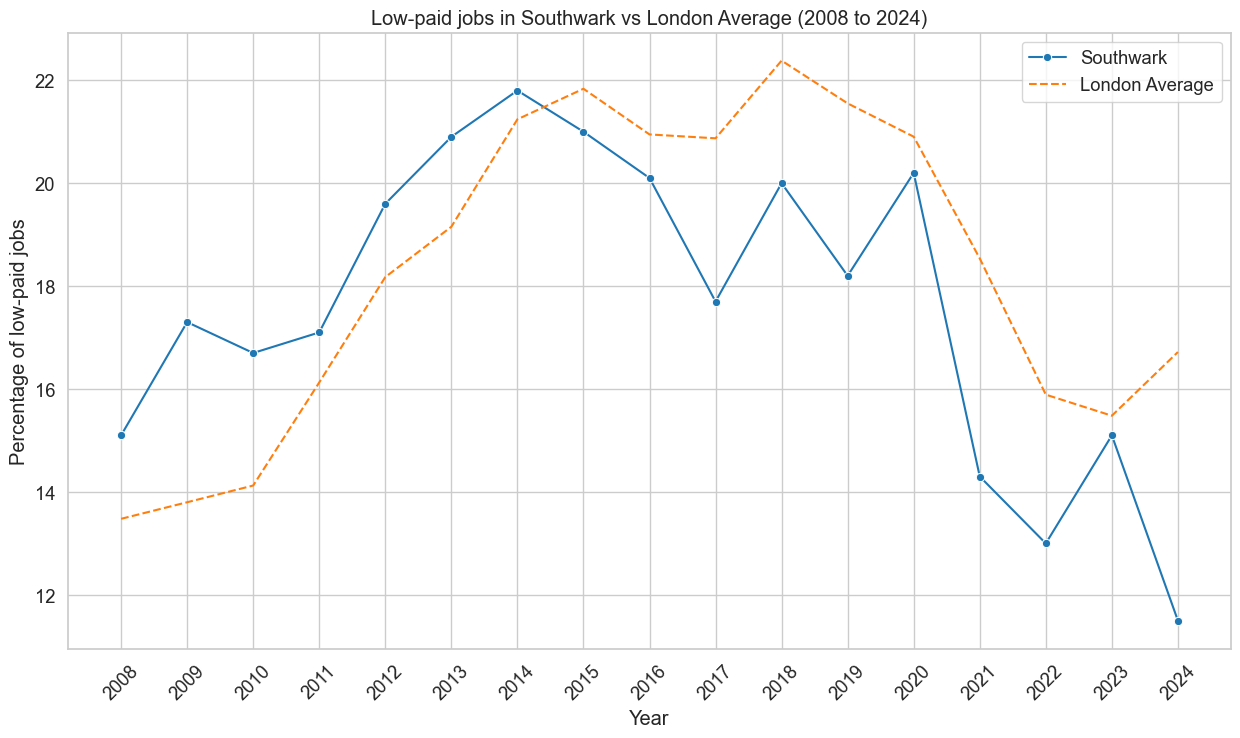

In [19]:
sns.set_style("whitegrid") 
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(15, 8))

southwark_data = main_df[main_df['Borough'] == 'Southwark']
year_columns = [column for column in main_df.columns if 'Percentage' in column]
years = [int(year[-5:-1]) for year in year_columns]

plot_data = pd.DataFrame({
    'Year': years,
    'Southwark': southwark_data[year_columns].values.flatten(),
    'London Average': main_df[year_columns].mean().values
})

sns.lineplot(data=plot_data, x='Year', y='Southwark', marker='o', label='Southwark')
sns.lineplot(data=plot_data, x='Year', y='London Average', linestyle='--', label='London Average')

plt.title('Low-paid jobs in Southwark vs London Average (2008 to 2024)')
plt.xlabel('Year')
plt.ylabel('Percentage of low-paid jobs')
plt.xticks(years, rotation=45)

In [20]:
def analyse_borough_trends(df):
    start_year = 'Percentage of low-paid jobs (2008)'
    end_year = 'Percentage of low-paid jobs (2024)'
    
    changes = df[[start_year, end_year, 'Borough']].copy()
    changes['Total Change'] = changes[end_year] - changes[start_year]
    changes = changes.sort_values('Total Change', ascending=False)
    
    return changes

In [21]:
changes = analyse_borough_trends(main_df)
print("\nBoroughs with largest increase in low-paid jobs (2008 to 2024):")
print(changes.head())
print("\nBoroughs with largest decrease in low-paid jobs (2008 to 2024):")
print(changes.tail())


Boroughs with largest increase in low-paid jobs (2008 to 2024):
    Percentage of low-paid jobs (2008)  Percentage of low-paid jobs (2024)  \
26                                 9.8                                22.6   
20                                10.0                                18.8   
16                                14.7                                21.5   
17                                16.3                                22.9   
0                                 17.3                                23.8   

                 Borough  Total Change  
26             Redbridge          12.8  
20  Kingston upon Thames           8.8  
16            Hillingdon           6.8  
17              Hounslow           6.6  
0   Barking and Dagenham           6.5  

Boroughs with largest decrease in low-paid jobs (2008 to 2024):
    Percentage of low-paid jobs (2008)  Percentage of low-paid jobs (2024)  \
33                                 9.5                                 9.9   

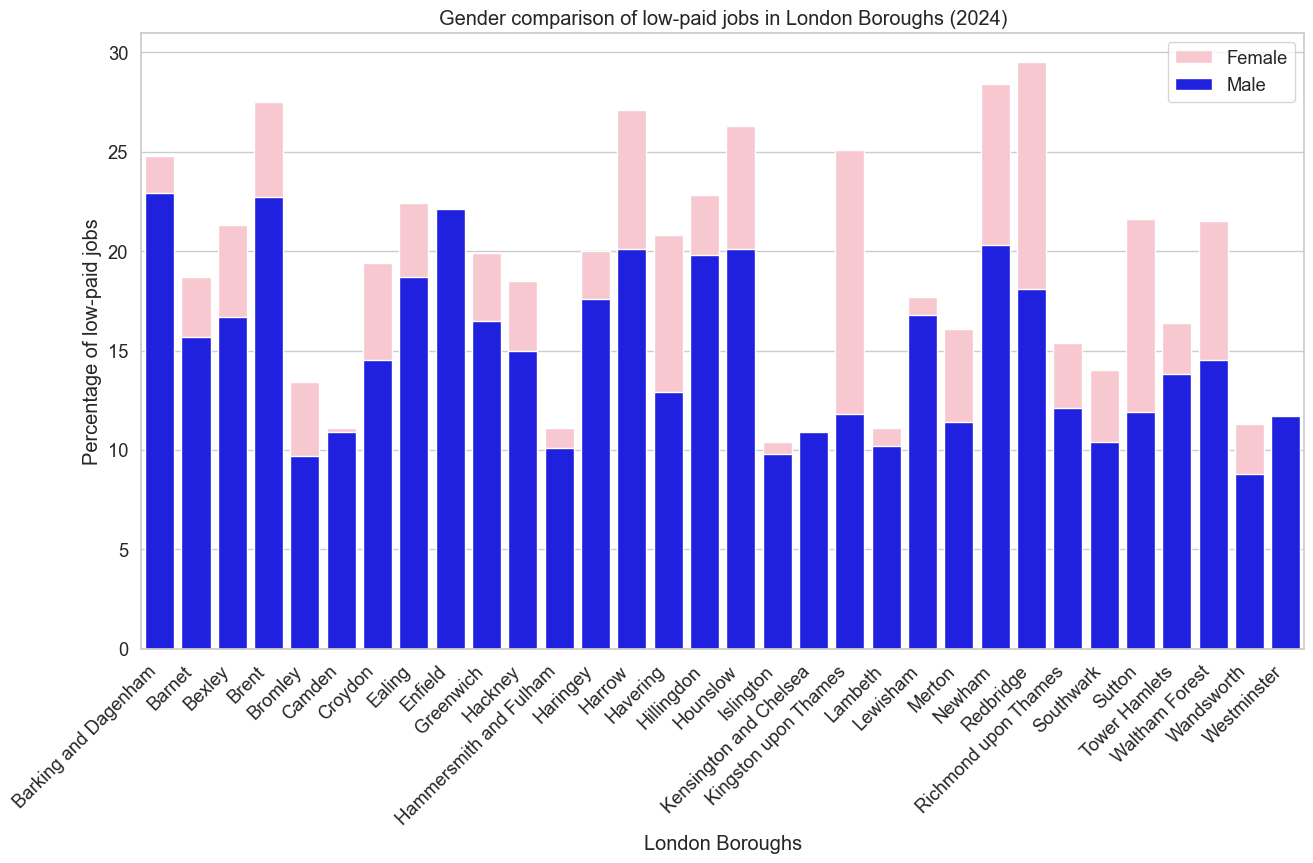


Gender Gap Statistics for Southwork:
--------------------
Female in low-paid jobs: 14.0%
Male in low-paid jobs: 10.4%
------------------------------

Gender Gap Statistics for all London Boroughs:
--------------------------------------------------

Barking and Dagenham:
Female in low-paid jobs: 24.8%
Male in low-paid jobs: 22.9%
Gender gap: 1.9%

Barnet:
Female in low-paid jobs: 18.7%
Male in low-paid jobs: 15.7%
Gender gap: 3.0%

Bexley:
Female in low-paid jobs: 21.3%
Male in low-paid jobs: 16.7%
Gender gap: 4.6%

Brent:
Female in low-paid jobs: 27.5%
Male in low-paid jobs: 22.7%
Gender gap: 4.8%

Bromley:
Female in low-paid jobs: 13.4%
Male in low-paid jobs: 9.7%
Gender gap: 3.7%

Camden:
Female in low-paid jobs: 11.1%
Male in low-paid jobs: 10.9%
Gender gap: 0.2%

Croydon:
Female in low-paid jobs: 19.4%
Male in low-paid jobs: 14.5%
Gender gap: 4.9%

Ealing:
Female in low-paid jobs: 22.4%
Male in low-paid jobs: 18.7%
Gender gap: 3.7%

Enfield:
Female in low-paid jobs: 21.5%
Male in 

In [32]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(15, 8))

sns.barplot(data=sex_df, x='Borough', y='Percentage of low-paid jobs (Female)', 
           label='Female', color='pink')
sns.barplot(data=sex_df, x='Borough', y='Percentage of low-paid jobs (Male)', 
           label='Male', color='blue')

plt.title('Gender comparison of low-paid jobs in London Boroughs (2024)')
plt.xlabel('London Boroughs')
plt.ylabel('Percentage of low-paid jobs')

plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()

# Printing simple statistics for Southwark
print("\nGender Gap Statistics for Southwork:")
print("-" * 20)
print(f"Female in low-paid jobs: {sex_df[sex_df['Borough'] == 'Southwark']['Percentage of low-paid jobs (Female)'].values[0]:.1f}%")
print(f"Male in low-paid jobs: {sex_df[sex_df['Borough'] == 'Southwark']['Percentage of low-paid jobs (Male)'].values[0]:.1f}%")
print("-" * 30)
print("\nGender Gap Statistics for all London Boroughs:")
print("-" * 50)
for index, row in sex_df.iterrows():
    print(f"\n{row['Borough']}:")
    print(f"Female in low-paid jobs: {row['Percentage of low-paid jobs (Female)']:.1f}%")
    print(f"Male in low-paid jobs: {row['Percentage of low-paid jobs (Male)']:.1f}%")
    gap = row['Percentage of low-paid jobs (Female)'] - row['Percentage of low-paid jobs (Male)']
    print(f"Gender gap: {gap:.1f}%")

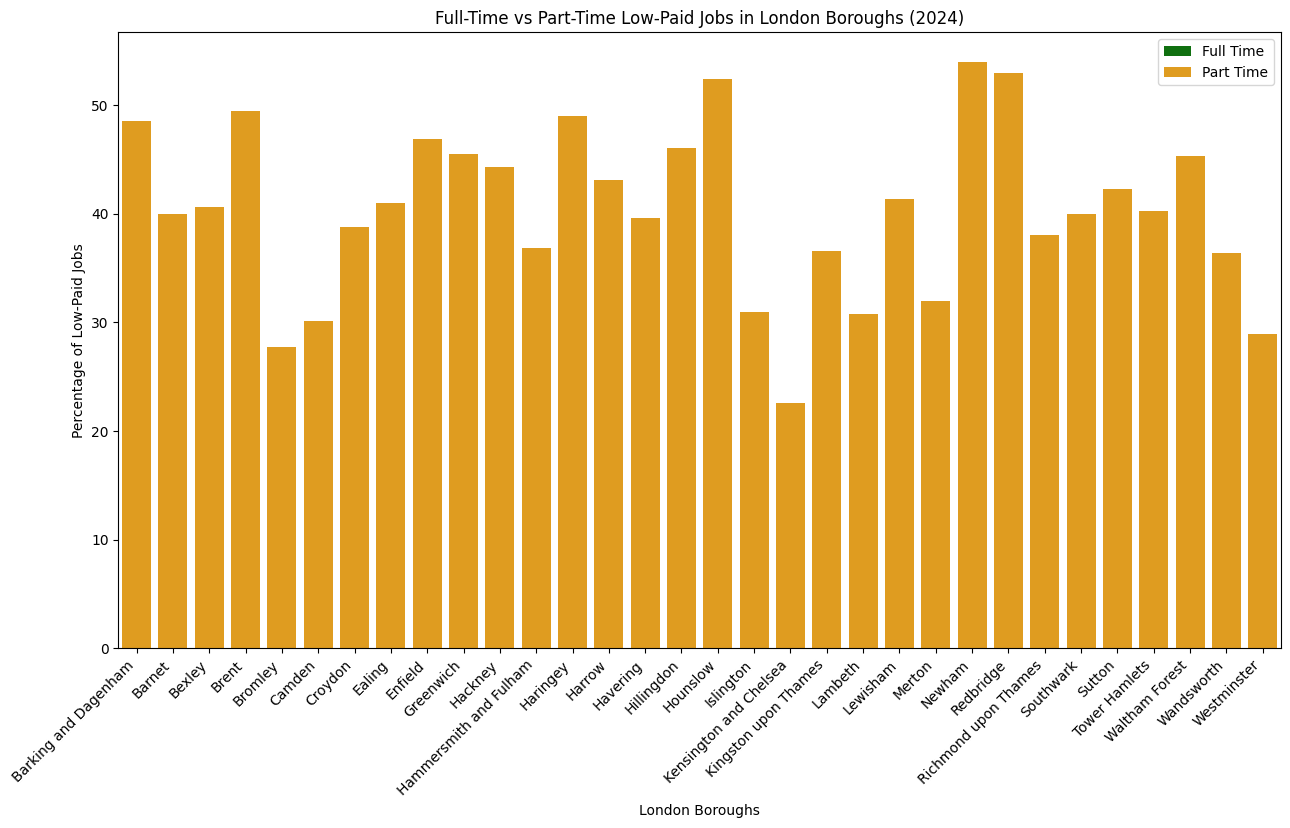


Employment Type Statistics for Southwork:
--------------------
Full-time workers in low-paid jobs: 9.5%
Part-time workers in low-paid jobs: 40.0%
Difference (Part-time - Full-time): 30.5%

Employment Type Statistics for All London Boroughs:
--------------------------------------------------

Barking and Dagenham:
Full-time workers in low-paid jobs: 13.8%
Part-time workers in low-paid jobs: 48.5%
Difference (Part-time - Full-time): 34.7%

Barnet:
Full-time workers in low-paid jobs: 9.8%
Part-time workers in low-paid jobs: 40.0%
Difference (Part-time - Full-time): 30.2%

Bexley:
Full-time workers in low-paid jobs: 11.8%
Part-time workers in low-paid jobs: 40.6%
Difference (Part-time - Full-time): 28.8%

Brent:
Full-time workers in low-paid jobs: 16.7%
Part-time workers in low-paid jobs: 49.4%
Difference (Part-time - Full-time): 32.7%

Bromley:
Full-time workers in low-paid jobs: 9.2%
Part-time workers in low-paid jobs: 27.7%
Difference (Part-time - Full-time): 18.5%

Camden:
Full-time w

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(data=employment_df, x='Borough',
            y='Percentage of low-paid jobs (Full Time Workers)', 
            label='Full Time', color='green')
sns.barplot(data=employment_df, x='Borough',
            y='Percentage of low-paid jobs (Part Time Workers)', 
            label='Part Time', color='orange')

plt.title('Full-Time vs Part-Time Low-Paid Jobs in London Boroughs (2024)')
plt.xlabel('London Boroughs')
plt.ylabel('Percentage of Low-Paid Jobs')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()
print("\nEmployment Type Statistics for Southwork:")
print("-" * 20)
southwark_employment = employment_df[employment_df['Borough'] == 'Southwark'].iloc[0]
print(f"Full-time workers in low-paid jobs: {southwark_employment['Percentage of low-paid jobs (Full Time Workers)']:.1f}%")
print(f"Part-time workers in low-paid jobs: {southwark_employment['Percentage of low-paid jobs (Part Time Workers)']:.1f}%")
southwark_difference = southwark_employment['Percentage of low-paid jobs (Part Time Workers)'] - southwark_employment['Percentage of low-paid jobs (Full Time Workers)']
print(f"Difference (Part-time - Full-time): {southwark_difference:.1f}%")
print("\nEmployment Type Statistics for All London Boroughs:")
print("-" * 50)
for index, row in employment_df.iterrows():
    print(f"\n{row['Borough']}:")
    print(f"Full-time workers in low-paid jobs: {row['Percentage of low-paid jobs (Full Time Workers)']:.1f}%")
    print(f"Part-time workers in low-paid jobs: {row['Percentage of low-paid jobs (Part Time Workers)']:.1f}%")
    difference = row['Percentage of low-paid jobs (Part Time Workers)'] - row['Percentage of low-paid jobs (Full Time Workers)']
    print(f"Difference (Part-time - Full-time): {difference:.1f}%")

In [18]:
def analyse_2024_low_pay(main_df, sex_df, employment_df):
    main_2024 = main_df[['Borough', 'Percentage of low-paid jobs (2024)']].copy()
    combined = main_2024.merge(sex_df[['Borough',
                                       'Percentage of low-paid jobs (Female)',
                                       'Percentage of low-paid jobs (Male)']],
                                    on='Borough', how='left')
    combined = combined.merge(employment_df[['Borough',
                                             'Percentage of low-paid jobs (Full Time Workers)',
                                             'Percentage of low-paid jobs (Part Time Workers)']],
                                        on='Borough', how='left')
    return combined
    
 

In [20]:
combined_2024 = analyse_2024_low_pay(main_df, sex_df, employment_df)
print(combined_2024)

                   Borough  Percentage of low-paid jobs (2024)  \
0     Barking and Dagenham                                23.8   
1                   Barnet                                17.6   
2                   Bexley                                20.0   
3                    Brent                                25.2   
4                  Bromley                                11.2   
5                   Camden                                10.5   
6                  Croydon                                17.6   
7                   Ealing                                20.3   
8                  Enfield                                21.4   
9                Greenwich                                18.8   
10                 Hackney                                16.0   
11  Hammersmith and Fulham                                10.7   
12                Haringey                                18.5   
13                  Harrow                                22.5   
14        